In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules")
from utils import ellipticity_from_Q


In [2]:
df_res_drif = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_drifter_ESPRA.pkl").copy()
df_res_sat = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_IMOS_ESPRA.pkl").copy()
df_res_num = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_copernicus_ESPRA.pkl").copy()
df_res_sadcp = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_sadcp_ESPRA.pkl").copy()


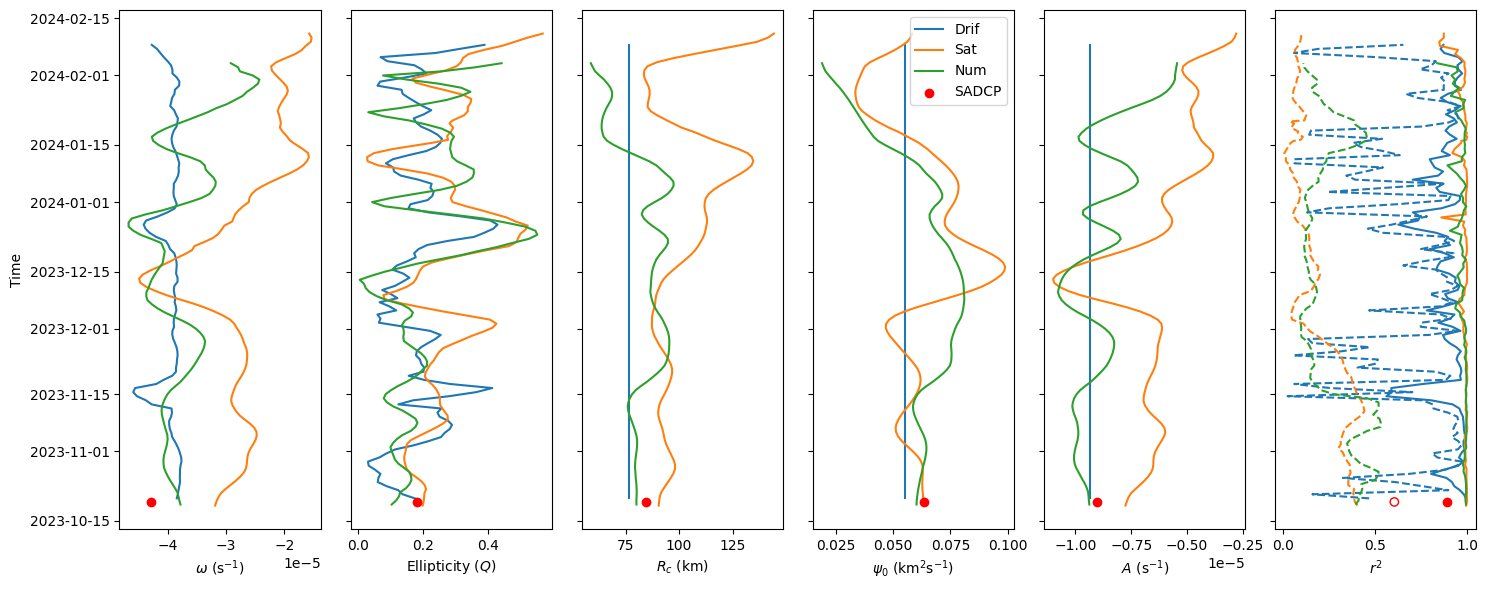

In [3]:
sadcp_data = df_res_sadcp.iloc[0]
colors = plt.get_cmap('tab10').colors

fig, axs = plt.subplots(1, 6, figsize=(15,6), sharey=True)
alpha = .4

axs[0].plot(df_res_drif.sw, df_res_drif.Time, color=colors[0])
axs[0].plot(df_res_sat.sw, df_res_sat.Time, color=colors[1])
axs[0].plot(df_res_num.sw, df_res_num.Time, color=colors[2])
axs[0].scatter(sadcp_data.sw, sadcp_data.Time_mean, color='r', zorder=5)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.ellip, df_res_drif.Time, color=colors[0])
axs[1].plot(df_res_sat.ellip,  df_res_sat.Time,  color=colors[1])
axs[1].plot(df_res_num.ellip,  df_res_num.Time,  color=colors[2])

axs[1].scatter(sadcp_data.ellip, sadcp_data.Time_mean, color='r', zorder=5)

axs[1].set_xlabel(r'Ellipticity ($Q$)') #0 circular

axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time, color=colors[0])
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time, color=colors[1])
axs[2].plot(df_res_num.sRc/1e3, df_res_num.Time, color=colors[2])
axs[2].scatter(sadcp_data.sRc/1e3, sadcp_data.Time_mean, color='r', zorder=5)
axs[2].set_xlabel(r'$R_c$ (km)')

axs[3].plot(df_res_drif.spsi0/1e6, df_res_drif.Time, color=colors[0], label='Drif')
axs[3].plot(df_res_sat.spsi0/1e6, df_res_sat.Time, color=colors[1], label='Sat')
axs[3].plot(df_res_num.spsi0/1e6, df_res_num.Time, color=colors[2], label='Num')
axs[3].scatter(sadcp_data.spsi0/1e6, sadcp_data.Time_mean, color='r', zorder=5, label='SADCP')
axs[3].set_xlabel(r'$\psi_0$ (km$^2$s$^{-1}$)'); axs[3].legend(loc='upper right')

axs[4].plot(df_res_drif.sA, df_res_drif.Time, color=colors[0])
axs[4].plot(df_res_sat.sA, df_res_sat.Time, color=colors[1])
axs[4].plot(df_res_num.sA, df_res_num.Time, color=colors[2])
axs[4].scatter(sadcp_data.sA, sadcp_data.Time_mean, color='r', zorder=5)
axs[4].set_xlabel(r'$A$ (s$^{-1}$)')

axs[5].plot(df_res_drif.r2_1, df_res_drif.Time, color=colors[0])
axs[5].plot(df_res_sat.r2_1, df_res_sat.Time, color=colors[1])
axs[5].plot(df_res_num.r2_1, df_res_num.Time, color=colors[2])
axs[5].scatter(sadcp_data.r2_1, sadcp_data.Time_mean, color='r', zorder=5)
axs[5].plot(df_res_drif.r2_2, df_res_drif.Time, color=colors[0], ls='--')
axs[5].plot(df_res_sat.r2_2, df_res_sat.Time, color=colors[1], ls='--')
axs[5].plot(df_res_num.r2_2, df_res_num.Time, color=colors[2], ls='--')
axs[5].scatter(sadcp_data.r2_2, sadcp_data.Time_mean, color='r', zorder=5, facecolors='none')
axs[5].set_xlabel(r'$r^2$')

# for ax in axs:
#     ax.grid(True)
axs[0].set_ylabel('Time')

plt.tight_layout()


In [37]:
colors[0]


(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

Text(0, 0.5, 'y (km)')

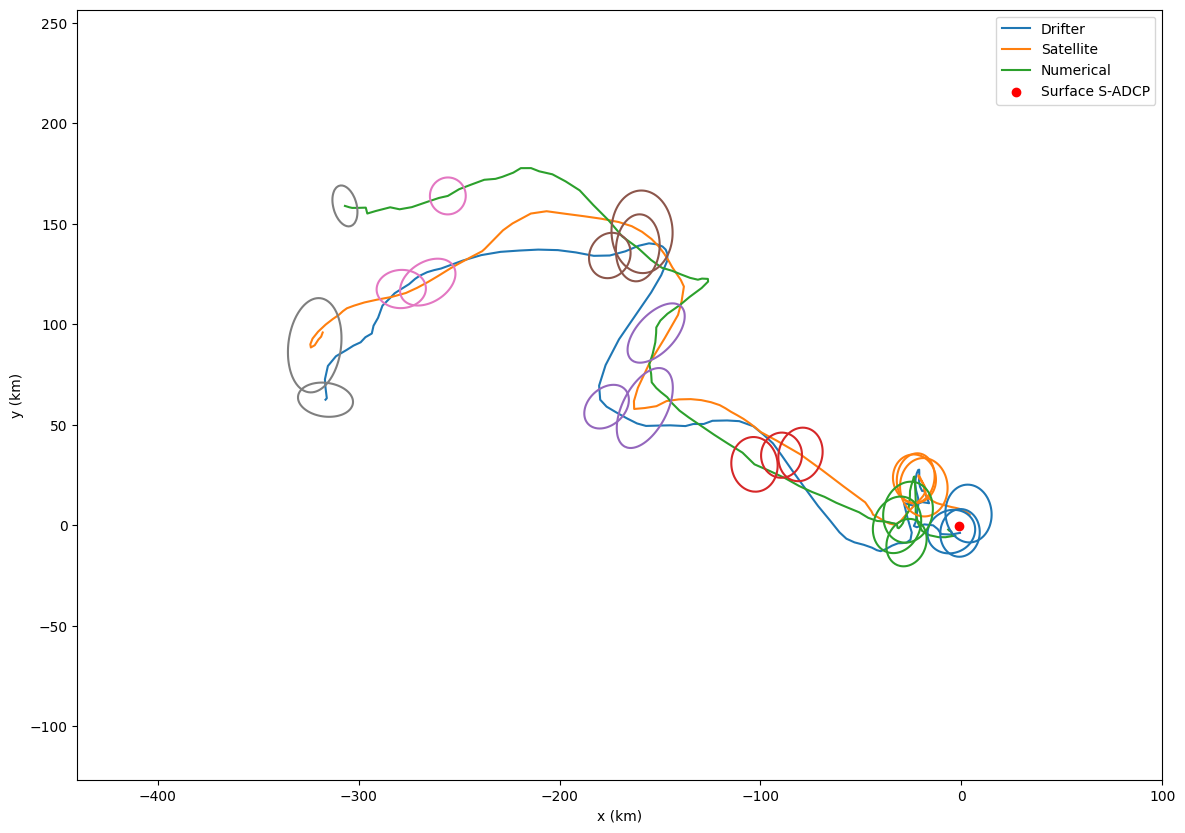

In [48]:
x = np.linspace(-400, 100, 501) * 1e3
y = np.linspace(-100, 300, 501) * 1e3
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(14, 10))
plt.plot(df_res_drif.sxc/1e3, df_res_drif.syc/1e3, label='Drifter')
plt.plot(df_res_sat.sxc/1e3,  df_res_sat.syc/1e3,  label='Satellite')
plt.plot(df_res_num.sxc/1e3,  df_res_num.syc/1e3,  label='Numerical')
plt.scatter(sadcp_data.sxc/1e3, sadcp_data.syc/1e3, color='r', label='Surface S-ADCP')

dfs = [df_res_drif, df_res_sat, df_res_num]

idxs = np.linspace(0, len(df_res_drif)-1, 8, dtype=int)
idxs = np.unique(idxs)

# idxs = [0,  27,  55]
times = df_res_drif.Time.iloc[idxs]

cmap = plt.get_cmap('tab10')
for t, time in enumerate(times):
    c = cmap(t % cmap.N)
    for df in dfs:
        i = (df.Time - time).abs().argmin()
        row = df.iloc[i]

        dx = X/1e3 - row.sxc/1e3
        dy = Y/1e3 - row.syc/1e3
        rho2 = row.sq11*dx**2 + 2*row.sq12*dx*dy + row.sq22*dy**2

        plt.contour(X/1e3, Y/1e3, rho2,
                    levels=[((row.sRc/5)/1e3)**2/2],
                    colors=[c], linewidths=1.5)

plt.axis('equal'); plt.legend()
plt.xlim(-440, 100); plt.ylim(-100, 230)
plt.xlabel('x (km)'); plt.ylabel('y (km)')
